In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def Messure(A, B):
    N = len(B)
    s = 0
    for i in range(N):
        for j in range(N):
            s = s + (abs(A[i,j] - B[i,j]))**2

    return np.sqrt(s)

def Messure_abs(A, B):
    X = np.subtract(A, B)
    l2 = np.linalg.norm(X)
    if l2 == 0: return 1
    print(l2)
    return l2

def U_b(x):
    return np.sin(np.pi * x / 2)

def LaPlaS_Simp(L_b, U_b, D_b, l, h, E):
    N = int(l/h) + 1
    x_s = np.zeros((N,N))
    
    x_s[:, 0] = D_b
    for i in range(N):
        x_s[i, N-1] = U_b(i*h)
    x_s[0, :] = L_b
    # x_s[N, :] = R_b        -  По идее должно быть так, но нет - не должно
    
    x = x_s
    k = 0
    dif = 1

    while k < 1000 and dif > E:
        y = x_s
        dif = 0

        for i in range(1, N-1):
            for j in range(1, N-1):
                dif = dif + (x[i,j] - y[i,j])**2
                y[i,j] = (x[i-1,j]+x[i+1,j]+x[i,j-1]+x[i,j+1])/4
        y[-1] = y[-2]
        
        dif = np.sqrt(dif)
        
        if dif == 0: dif = 1


        
        x = y
        k+=1

    print (k)

    return (y)

1000


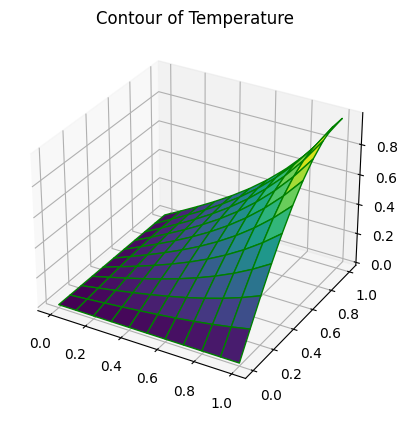

In [20]:
h = 0.1
colorinterpolation = 50
colourMap = plt.cm.jet

x, y = np.linspace(0, 1, int(1/h) + 1), np.linspace(0, 1, int(1/h) + 1)
X, Y = np.meshgrid(x, y)
Z = LaPlaS_Simp(0, U_b, 0, 1, h, 0.1)


ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='green')
ax.set_title('Contour of Temperature')
plt.show()


# Метод релаксации

In [ ]:
def Messure(A, B):
    N = len(B)
    s = 0
    for i in range(N):
        for j in range(N):
            s = s + (abs(A[i,j] - B[i,j]))**2

    return np.sqrt(s)

def U_b(x):
    return np.sin(np.pi * x)

def LaPlaS_Relax(L_b, U_b, D_b, l, h, E):
    N = int(l/h) + 1
    x_s = np.zeros((N,N))
    
    x_s[:, 0] = D_b
    for i in range(N):
        x_s[i, N-1] = U_b(i*h)
    x_s[0, :] = L_b
    # x_s[N, :] = R_b        -  По идее должно быть так, но нет - не должно
    
    x = x_s
    k = 0

    dif = 1

    while k < 1000 :
        y = x_s
        for i in range(1, N-1):
            for j in range(1, N-1):
                y[i,j] = (x[i-1,j]+x[i+1,j]+x[i,j-1]+x[i,j+1])/4
        y[-1] = y[-2]
        dif = Messure(x,y)
        x = y
        k+=1

    return (y)

In [55]:
A = [[1, 0, 2],
     [0, 3, 0],
     [4, 0, 5]]

n = len(A)

# for i in range(n): 
#     for j in range(n): 
#         if n-1-i < j: 
#             A[i][j],A[n-1-j][n-1-i] = A[n-1-j][n-1-i],A[i][j]

print(A)

[[1, 0, 2], [0, 3, 0], [4, 0, 5]]


In [86]:
B = [[1, 0, 2],
     [0, 3, 0],
     [4.00000000000001, 0, 5]]

np.linalg.norm(np.subtract(A, B))

9.769962616701378e-15